In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
from scipy.optimize import curve_fit

In [6]:
plt.rcParams['text.usetex'] = True
from IPython.display import display, Math

## Oscilador Armónico Simple (Sistema masa–resorte)

El movimiento del sistema masa–resorte ideal (sin rozamiento) está gobernado por la ecuación diferencial:

$$
m\ddot{y}(t) + ky(t) = 0
$$

donde la **frecuencia angular** del sistema es:
$$
\omega = \sqrt{\frac{k}{m}}
$$
---
## Posición

La solución general para la posición es:
$$
\boxed{
y(t) = A \cos(\omega t - \phi)
}
$$
donde:
* (A) es la amplitud,
* ($\phi$) es la fase inicial.

## Velocidad

La velocidad se obtiene derivando la posición respecto al tiempo:
$$
\boxed{
y'(t) = \frac{dy}{dt} = -A,\omega \sin(\omega t - \phi)
}
$$

## Aceleración

Derivando nuevamente se obtiene la aceleración:
$
\boxed{
y''(t) = \frac{d^2y}{dt^2} = -A,\omega^2 \cos(\omega t - \phi)
}
$

o, de forma equivalente,

$$
\boxed{
y''(t) = -\omega^2 y(t)
}
$$



In [7]:
def posicion(t, A, omega, phi):
    """Posición en el MAS"""
    y =  A * np.cos(omega * t - phi)
    return y 

def y_prime(t, A, omega, phi):
    """Velocidad en el MAS"""
    return -A * omega * np.sin(omega * t - phi)

def y_doubleprime(t, A, omega, phi):
    """Aceleración en el MAS"""
    return -A * omega**2 * np.cos(omega * t - phi)

In [21]:
# Leer el archivo CSV
df = pd.read_csv("../Data/mas_datos.csv")

# Ver las primeras filas
df.head()

t_list = df["tiempo_s"].values 
y_list = df["posicion_m"].values

sigma_t = 0.001  
sigma_y = 0.05    

# Ruido gaussiano
ruido_t = np.random.normal(0, sigma_t, size=len(t_list))
ruido_y = np.random.normal(0, sigma_y, size=len(y_list))

# Datos "medidos"
t_med = t_list + ruido_t
y_med = y_list + ruido_y


A_fit =  0.9982219615447387 Omega_fit=  6.286383469457712 phi_fit=  0.007158166637354933


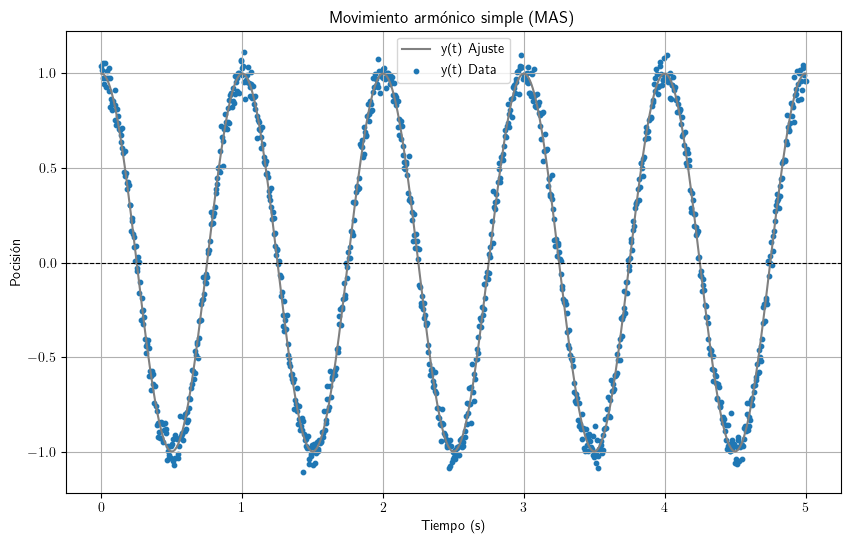

In [48]:
import matplotlib.pyplot as plt

# Parámetros del sistema
A = 1.0            # Amplitud (m)
omega = 2*np.pi   # Frecuencia angular (rad/s)
phi = 0.0          # Fase inicial (rad)

# Tiempo
t = np.linspace(0, 5, 1000)

# Ajuste con curve_fit
popt, pcov = curve_fit(posicion, t,  y_med, p0 = [A, omega, phi])
A_fit, omega_fit, phi_fit = popt

print("A_fit = ", A_fit, "Omega_fit= ", omega_fit,"phi_fit= ", phi_fit)
# Graficar
plt.figure(figsize=(10,6))
plt.plot(t, posicion(t, A_fit, omega_fit, phi_fit), label="y(t) Ajuste", c = 'grey')
plt.scatter(t_med, y_med, label="y(t) Data", s = 10)

#plt.plot(t, V, label="y'(t) velocidad")
#plt.plot(t, Acel, label="y''(t) aceleración")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.xlabel("Tiempo (s)")
plt.ylabel("Pocisión")
plt.title("Movimiento armónico simple (MAS)")
plt.legend()
plt.grid(True)
plt.show()


## Energía cinética

La energía cinética del sistema es:
$$
\boxed{
K(t) = \frac{1}{2} m ,[y'(t)]^2
}
$$

Sustituyendo la expresión de la velocidad:

$$
K(t) = \frac{1}{2} m A^2 \omega^2 \sin^2(\omega t - \phi)
$$

---

## Energía potencial elástica

La energía potencial asociada al resorte es:

$$
\boxed{
V(t) = \frac{1}{2} k ,[y(t)]^2
}
$$

Sustituyendo la posición:

$$
V(t) = \frac{1}{2} k A^2 \cos^2(\omega t - \phi)
$$

---

## Energía mecánica total

La energía mecánica total del sistema es la suma de la energía cinética y potencial:

$$
\boxed{
E(t) = K(t) + V(t)
}
$$

Usando la relación (k = m\omega^2), se obtiene:

$$
\boxed{
E(t) = \frac{1}{2} k A^2 = \frac{1}{2} m \omega^2 A^2 = \text{constante}
}
$$

---

In [ ]:
def energia_cinetica(t, m, A, omega, phi):
    """Energía cinética en el MAS"""
    v = -A * omega * np.sin(omega * t - phi)   # velocidad
    return 0.5 * m * v**2

def energia_potencial(t, k, A, omega, phi):
    """Energía potencial elástica en el MAS"""
    y = A * np.cos(omega * t - phi)            # posición
    return 0.5 * k * y**2

def energia_total(t, m, k, A, omega, phi):
    """Energía mecánica total (constante)"""
    return energia_cinetica(t, m, A, omega, phi) + energia_potencial(t, k, A, omega, phi)

omega= 6.283185307179586


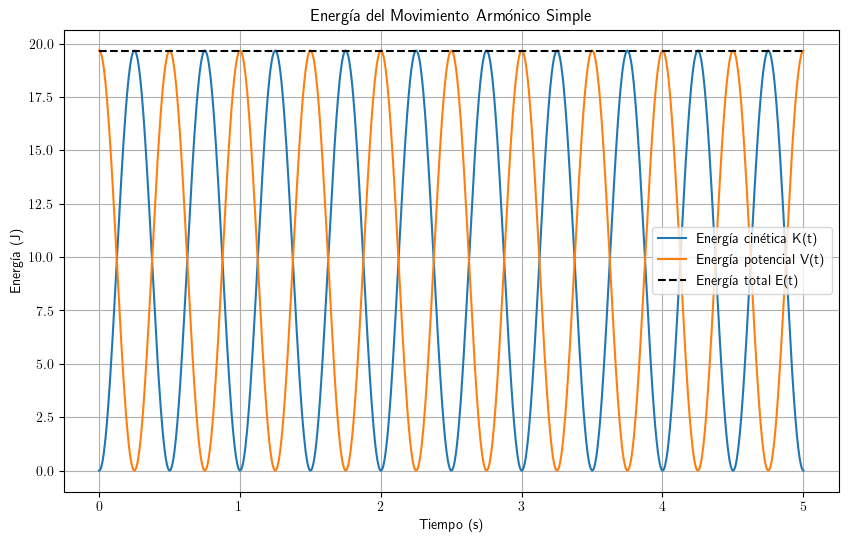

In [53]:
# Parámetros del sistema
A = A_fit          # Amplitud (m)  
phi = phi_fit      # Fase inicial (rad)
m = 1.0       # kg
k = 4*np.pi**2  # N/m ≈ 39.48
omega = np.sqrt(k/m)

print("omega=", omega)

# Tiempo
t = t_med

# Calcular energías
K = energia_cinetica(t, m, A, omega, phi)
U = energia_potencial(t, k, A, omega, phi)
E = energia_total(t, m, k, A, omega, phi)

# Graficar

plt.figure(figsize=(10,6))
plt.plot(t, K, label="Energía cinética K(t)")
plt.plot(t, U, label="Energía potencial V(t)")
plt.plot(t, E, label="Energía total E(t)", linestyle="--", color="black")
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía (J)")
plt.title("Energía del Movimiento Armónico Simple")
plt.legend()
plt.grid(True)
plt.show()